# LSTM test / sin wave prediction

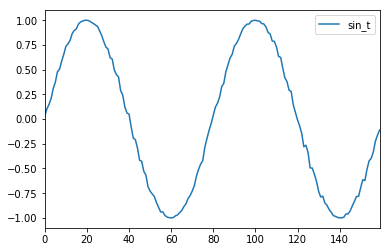

In [9]:
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline
random.seed(0)
# 乱数の係数
random_factor = 0.05
# サイクルあたりのステップ数
steps_per_cycle = 80
# 生成するサイクル数
number_of_cycles = 50

df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
df["sin_t"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-1.0, +1.0) * random_factor))
df[["sin_t"]].head(steps_per_cycle * 2).plot()

In [13]:
df

,t,sin_t
0,0,0.034435
1,1,0.104146
2,2,0.148585
3,3,0.209938
4,4,0.310089
5,5,0.373883
6,6,0.479091
7,7,0.505628
8,8,0.585890
9,9,0.655766


In [10]:

def _load_data(data, n_prev = 100):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1, n_prev = 100):  
    """
    This just splits data to training and testing parts
    """
    ntrn = round(len(df) * (1 - test_size))
    ntrn = int(ntrn)
    X_train, y_train = _load_data(df.iloc[0:ntrn], n_prev)
    X_test, y_test = _load_data(df.iloc[ntrn:], n_prev)

    return (X_train, y_train), (X_test, y_test)

In [11]:
length_of_sequences = 100
(X_train, y_train), (X_test, y_test) = train_test_split(df[["sin_t"]], n_prev =length_of_sequences)

In [15]:
print(X_train[0])

[[ 0.03443538]
 [ 0.10414606]
 [ 0.14858456]
 [ 0.20993759]
 [ 0.31008909]
 [ 0.37388333]
 [ 0.47909093]
 [ 0.50562824]
 [ 0.5858903 ]
 [ 0.65576582]
 [ 0.73536793]
 [ 0.76071027]
 [ 0.79600224]
 [ 0.86572549]
 [ 0.89631782]
 [ 0.91404528]
 [ 0.96291657]
 [ 0.98250296]
 [ 0.99206522]
 [ 0.99926576]
 [ 0.99981979]
 [ 0.99485097]
 [ 0.98066533]
 [ 0.96791057]
 [ 0.95191366]
 [ 0.93841956]
 [ 0.89397573]
 [ 0.84679404]
 [ 0.78405781]
 [ 0.72928567]
 [ 0.70873057]
 [ 0.62124254]
 [ 0.6069914 ]
 [ 0.49625165]
 [ 0.44964599]
 [ 0.42711068]
 [ 0.28804894]
 [ 0.24327134]
 [ 0.12427302]
 [ 0.06168531]
 [ 0.04986503]
 [-0.07781885]
 [-0.1926283 ]
 [-0.20847021]
 [-0.29234658]
 [-0.4166401 ]
 [-0.42625213]
 [-0.52824285]
 [-0.56644046]
 [-0.68427744]
 [-0.72821657]
 [-0.75701658]
 [-0.78365152]
 [-0.84310051]
 [-0.89136674]
 [-0.93957291]
 [-0.93825213]
 [-0.97355395]
 [-0.99070874]
 [-0.99727833]
 [-0.99950559]
 [-0.99659318]
 [-0.97937261]
 [-0.96990938]
 [-0.94831253]
 [-0.92597072]
 [-0.88659

In [12]:
from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM


in_out_neurons = 1
hidden_neurons = 300

model = Sequential()  
model.add(LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_out_neurons), return_sequences=False))  
model.add(Dense(in_out_neurons))  
model.add(Activation("linear"))  
model.compile(loss="mean_squared_error", optimizer="rmsprop")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 300)               362400    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 301       
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, batch_size=600, epochs=15, validation_split=0.05) 

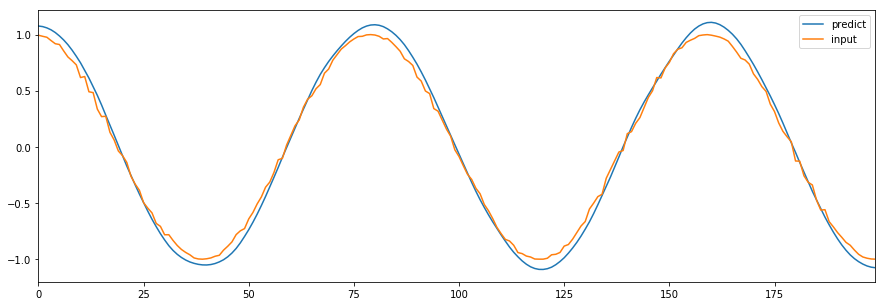

In [7]:
predicted = model.predict(X_test) 
dataf =  pd.DataFrame(predicted[:200])
dataf.columns = ["predict"]
dataf["input"] = y_test[:200]
dataf.plot(figsize=(15, 5))